# Examen Final
##### Nombre: Sebastián Daniel Gómez Farje
##### Código: 20200901
##### Curso: Fundamentos de Macroeconomía
##### Código de Curso: 1REI05
##### Horario de Curso: 0651
##### Profesor: Alexander Wilder Quispe Rojas

## Pregunta 1: Instrumental Variables (3 puntos)
Suponga que estamos interesados en estudiar la relación entre educación (X) y el nivel de ingresos (Y).
Un investigador propone utilizar como variable instrumental (Z) el número de horas que una persona utilizó para ver televisión cuando era niño.

- Indetifique todos los elementos necesarios para implementar un enfoque de IV en este ejemplo.
- Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones
- ¿El efecto de la educación sobre el nivel de ingresos es positivo o negativo? Argumente si los resultados serian causales o solamente de correlación

- En el ejemplo provisto, el instrumento podría no ser váido. Para que una variable sea variable instrumental (Z) dentro de un modelo en que la variable independiente (X) afecta (Y), deben cumplirse algunos supuestos. Primero, es importante considerar que la variable instrumental (Z) no es lo mismo que el error. No obstante, lo más importante es que la variable instrumental (Z) solo debe estar afectando al resultado final (Y) a través de la variable independiente (X). Es decir, es una variable instrumental porque es un instrumento que afecta una variable (X), la cual posteriormente impacta en el resultado (Y). Viéndolo de ese modo, en el ejemplo, la variable instrumental "número de horas que una persona utilizó para ver televisión cuando era niño" (Z) solo sería tal si es que únicamente afecta a "nivel de ingresos" (Y) a través de su efecto en "educación" (X). Hipotéticamente, si "número de horas que una persona utilizó para ver televisión cuando era niño" (Z) estuviera afectando a "nivel de inresos" (Y) de manera directa o por otro medio que no sea através de "educación" (X), el instrumento no sería válido. No obstante, personalmente no se me ocurre una manera en la que este pueda ser el caso, por lo que asumiré que es un instrumento válido para el ejemplo.

- Para encontrar el efecto causal en este escenario, se realizan regresiones. Primero, se podría utilizar una regresión lineal para observar si los p-values de las variables son válidos ($I$). Posteriormente, una regresión en que la variable esté instrumentalizada para verificar el efecto ($II$). Cabe resaltar que si, en la regresión, la variable Z no hecha instrumento afectara significativamente a Y de acuerdo a los p-values, no sería una variable intrumental porque afectaría a Y por otro medio que no sea através de X ($III$). También, en ($II$) se tendría que ver el F-Statistic para ver si es válido o robusto el instrumento utilizado.

$I.$
IV2SLS.from_formula("ingresos ~ educación", data).fit()

$II.$
IV2SLS.from_formula("ingresos ~ [educación ~ horastvniño]", data).fit()

$III.$
IV2SLS.from_formula("ingresos ~ educación + horastvniño", data).fit()

- Se podría anticipar que el efecto sería positivo, ya que con mayor educación se adquieren más capacidades o títulos que pueden ser beneficiosos al momento de conseguir trabajo con mayores remuneraciones. A través de un instrumento se limpia el problema de endogeneidad de la variable educación y a partir de esto se puede descubrir la relación causal que existe en la educación sobre el nivel de ingresos, utilizando el instrumento (Z). Se puede argumentar que la relación no solo es correlación y ya es causal justamente porque se esclarece la relación causal real entre X e Y, porque ha sido filtrada por Z para conocer la verdadera relación.

## Pregunta 2: Regression Discontinuity Design (3 puntos)

Supongamos que estamos estudiando la eficacia de un programa de becas creado por el gobierno Peruano sobre las notas de los alumnos al final del primer semestre en la universidad. PRONABEC ha decidido que entregará becas a aquellos postulantes que tengan un promedio superior durante la secundaria igual a 16 .

- Indetifique todos los elementos necesarios para implementar un RDD en este ejemplo.
- Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.
- ¿El efecto de la politica sobre el rendimiento de los estudiantes sería positivo o negativo (solo necesitan usar su intuición)? Argumente si los resultados serian causales o solamente de correlación .

- Variable Independiente sería las "notas de los alumnos al final del primer semestre en la Universidad". Running/Forcing Variable sería "promedio de notas durante la secundaria". Cut off sería "16". Bandwidth, ante ninguna especificación, podríamos asumir que sería un rango +-4 (i.e. 12 a 20, que es el máximo)

- Para encontrar el efecto causal, se utilizaría un gráfico. En el gráfico, la Variable Independiente iría en el eje Y, la Running/Forcing Variable en el eje X, donde también se indicaría el Cut off. De ahí, se colocarían los casos de acuerdo a sus valores en el gráfico, formando líneas de predictibilidad. Para medir el efecto, se mediría la distancia entre el último caso antes del salto y el primero después del salto. Adicionalmente, para evaluar correctamente el efecto, se usa el método de "Kernel Weighting" donde h es el Bandwidth.

$$K(R,c,g)=1(|R-c| <= h)*(1-(|R-c| / h))$$

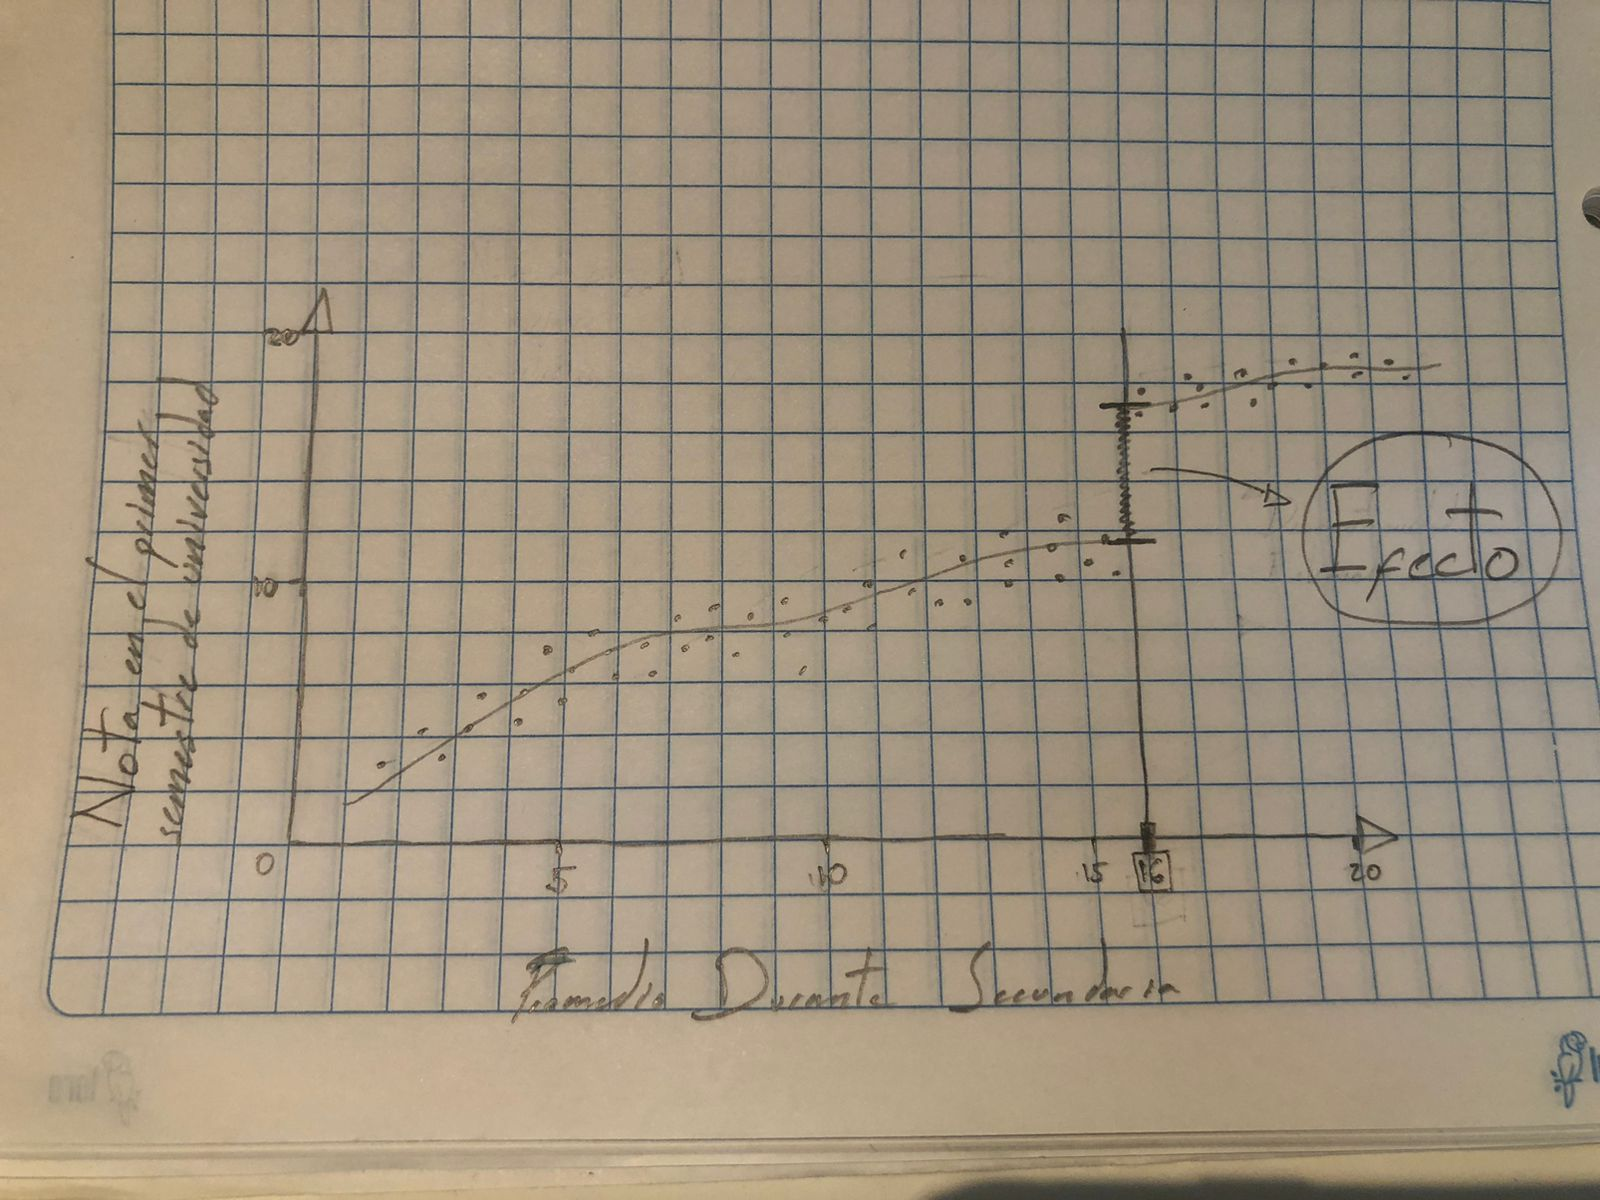

- El efecto sobre el rendimiento de los estudiantes sería probablemente positivo, ya que las becas ofrecen muchas facilidades y generan mayores incentivos para rendir mejor en universidades. Acerca de la causalidad, esta es parcialmente comprobada porque, al observarse un salto, se nota claramente el efecto existente de la variable. Claro, siempre cabe la posibilidad de que hayan otros factores influyendo. Por ejemplo, de por sí, con beca o no, es muy probable que estudiantes que cuenten con promedios mayoresa 16 en la secundaria se desempeñen mejor en la universidad que aquellos que no. No obstante, si el salto evidencia ser considerable, podría asumirse causalidad, ya que, de no ser por la beca, no habría razón por la cual el incremento de los valores de los casos no debería ser gradual (hay un salto).

## Pregunta 3: Difference in Difference (3 puntos)

Supongamos que estamos interesados ​​en estudiar el impacto de la migración en la tasa de empleo en dos regiones del Perú en 2017-2018. Tenemos datos anuales sobre la tasa de empleo en Lima, que experimentó una afluencia significativa de inmigrantes en 2018, y Puno que no experimentó el ingreso de migrantes (2017 ninguna de las regiones experimentó afluencia de migrantes). Podemos usar un análisis DID para comparar el cambio en las tasas de empleo entre las dos regiones a lo largo del tiempo para ver si la migración tuvo algún efecto.

- Indetifique todos los elementos necesarios para implementar un DiD en este ejemplo.
- Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.
- ¿El efecto de la migración sobre la tasa de empleo sería positivo o negativo (solo necesitan usar su intuición)? Argumente si los resultados serian causales o solamente de correlación .

- Primero, se debería verificar que ambas regiones estén en condiciones paraleleas en 2017. Si hay diferencia preexistente, entonces el modelo no sería válido. Luego, hay que ubicar los puntos de inicio de 2018 para Lima y Puno ("I2018L" y "I2018P") y los puntos de finales de 2018 para Lima y Puno ("F2018L" y "F2018P").

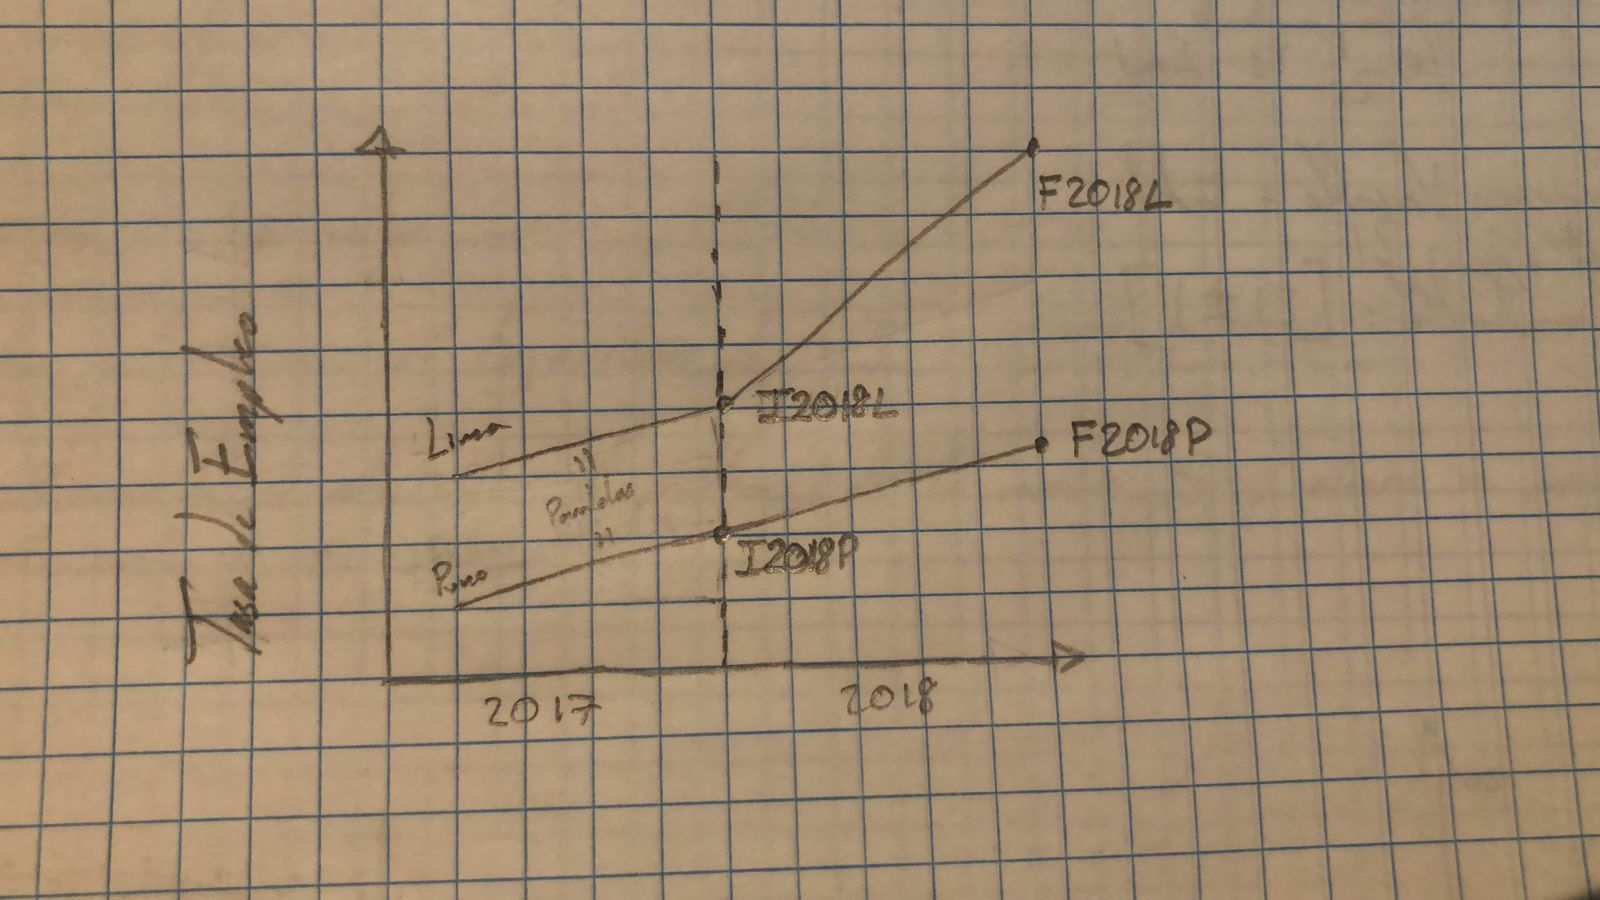

- La ecuación para encontrar el efecto causal en este modelo de diferencia en diferencias es la siguiente: La diferencia en la variación del grupo de tratados (Lima) con la diferencia en la variación del grupo de control (Puno).

$$(F2018L - F2018P) - (I2018L - I2018P)$$

- Se podría anticipar que, con afluencia de migrantes, la tasa de empleo se incrementaría ante la mayor presencia de PEA. En cuanto a la causalidad, similar al caso anterior, siempre podría haber más factores en juego, en especial en este ejemplo ya que Lima es significativamente diferente al resto de regiones. Si la recta de Puno en 2018 siguiese constante con 2017, esto evidenciaría que sí hay un efecto causal, ya que la variable está controlada y el grupo de control no habría variado. No obstante, aunque Lima tuviese una clara diferencia contando con mayor tasa de empleo en 2018, si Puno no se mantuviera igual en 2018 que en 2017, esto indicaría que hay otras variables en juego, por lo que afirmar causalidad solo con este ejemplo no sería oportuno, se estarían ignorando otras variables.

## Pregunta 4: Lecturas (3 puntos)

Bell, A., Chetty, R., Jaravel, X., Petkova, N., & Van Reenen, J. (2019). Who becomes an inventor in America? The importance of exposure to innovation. The Quarterly Journal of Economics, 134(2), 647-713.

- ¿Cuáles son las debilidades del enfoque del paper para responder su pregunta de investigación?

Una posible debilidad para el estudio es que solo se está considerando a gente innovadora o inventores a personalidades que cuentan con patentes. Aunque es verdad que es una manera de determinar quién inventó algo, si la conclusión final es que son habilidades innatas para la innovación, entonces reducirlo a solo quién tiene patentes puede no ser 100% equivalente, ya que hay varios casos de personas que obtuvieron patentes sin necesariamente estar muy vinculadas al proceso de desarrollo y pueden haber existido inventores desconocidos porque no llegaron a asegurar patente. El mismo problema persiste cuando se tiene en cuenta el costo de asegurarse una patente. Los hallazgos del estudio descubrieron que si el caso nacía de las familias en el 1% más afortunado, tenían 10 veces más probabilidades de ser inventores. ¿Acaso no es también más probable que personas más ricas puedan costearse una patente?

Por otro lado, en las conclusiones, una posible debilidad es que, aunque determinan que una exposición a programas de innovación a una temprana edad podría reducir la inequidad en innovación, no pueden identificar qué tipo de programas o cómo exactamente la exposición a innovación debería suceder en aquellos programas. Eso también puede estar relacionado a otra posible debilidad: la idea de exposición a la innovación es muy abstracta, ergo complicada de medir en datos sólidos.

Dell, M. (2010). The persistent effects of Peru's mining mita. Econometrica, 78(6), 1863-1903.

- ¿Cuáles serían dos próximos pasos específicos para avanzar en su pregunta de investigación?

Un primer paso para continuar la pregunta de investigación del artículo (“¿la imposición de la mita minera durante el dominio español tiene efectos a largo plazo en la actualidad en las áreas donde este sistema fue empleado?”) sería seguir observando posibles efectos que la mita minera pudo tener a largo plazo, i.e. en la actualidad. Un estudio reciente que sigue esa línea de estudio sería ‘La mita minera en Huancavelica y el despoblamiento durante los siglos XVI-XVIII. El caso de la provincia de Chimbivilcas, Perú’, de Sisko Rendón en 2016. Este artículo sigue los efectos de despoblamiento que la imposición de la mita en tiempos de dominio español tiene en la actualidad. Así, se podría investigar más a fondo los efectos de esta institución virreinal.

Un segundo paso, para continuar con la pregunta de estudio más general (“¿cómo y hasta qué punto el Estado puede moldear interacciones económicas en América Latina?”), simplemente se debería investigar otras maneras en que el Estado afecta las interacciones económicas. Esta área de estudio puede ser interminable porque, desde perspectivas constructivistas, por ejemplo, cualquier acto del Estado tendría este efecto. El artículo ‘The challenges of the global economic situation for Latin America’ de Ángel Gurria innova en el tema porque explora el Estado y las interacciones teniendo en mente los efectos del sistema internacional. Otro artículo, es el de Heidi Colleran: ‘Market integration and the changing nature of social interactions in agricultural populations’, que trata el tema desde una perspectiva más tradicional y enfocándose en las interacciones económicas de poblaciones agrarias.

## Pregunta 5: Código (4 puntos)

In [1]:
from causalgraphicalmodels import CausalGraphicalModel
import os
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns

### Ploteo de histogramas

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

data = read_data("card.dta")
data

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,5218.0,0.0,1.0,12.0,25.0,8.0,12.0,82135.0,1.0,0.0,...,15.0,NaN,1.0,0.0,7.0,5.814130,49.0,-0.289775,6.103905,-1.505588
3006,5219.0,0.0,1.0,13.0,34.0,NaN,NaN,88765.0,1.0,0.0,...,43.0,NaN,1.0,1.0,15.0,6.175867,225.0,-0.137418,6.313285,2.214089
3007,5220.0,0.0,1.0,12.0,24.0,11.0,NaN,89271.0,0.0,0.0,...,25.0,109.0,1.0,0.0,6.0,6.214608,36.0,0.135805,6.078803,-1.907211
3008,5221.0,0.0,1.0,12.0,31.0,NaN,NaN,110376.0,1.0,0.0,...,32.0,107.0,1.0,1.0,13.0,6.569481,169.0,0.408375,6.161106,0.868737


In [3]:
data1 = data

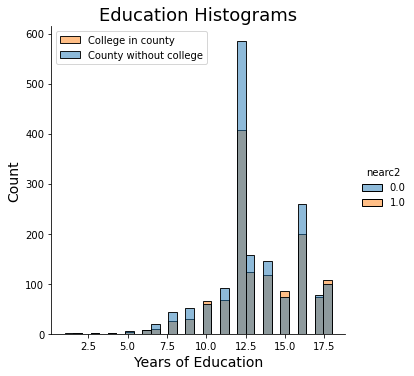

In [4]:
sns.displot(data1, x="educ", hue="nearc2")
labels= ["College in county","County without college"]
plt.xlabel("Years of Education", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Education Histograms", fontsize=18)
plt.legend(labels)

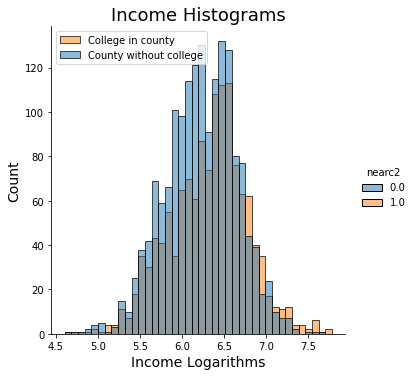

In [5]:
sns.displot(data1, x="lwage", hue="nearc2")
labels= ["College in county","County without college"]
plt.xlabel("Income Logarithms", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Income Histograms", fontsize=18)
plt.legend(labels)

### Regresiones

In [6]:
reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = data1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          1.97e-232
Time:                        17:36:47   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Con un R cuadrado de 0.305, el modelo construido explica la variable dependiente, lwage, en 30.5%. Se puede notar que todas las variables independientes en el modelo son significativas porque todos los p-value (P>|t|) son menores a 0.05. Si observamos a la variable educ (la variable que será instrumentalizada más adelante) en este modelo, se concluye que, por cada año adicional de educación, la variable dependiente aumentará en 0.0712 unidades logarítmicas. Asimismo, por cada unidad en que varíen el resto de las variables independientes, la variable dependiente variará, en unidades logarítmicas, por lo que indique la columna de coeficientes.

In [8]:
data1['married'] = data1['married'].fillna(0)

In [9]:
reg_iv = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2 ]", data1).fit()
reg_iv.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.3114
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3160
No. Observations:                3010   F-statistic:                    289.62
Date:                Fri, Dec 09 2022   P-value (F-stat)                0.0000
Time:                        17:42:04   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1276     3.1412     0.0406     0.9676     -6.0290      6.2843
black          0.1134     0.1816     0.6244     0.5324     -0.2425      0.4692
exper          0.1515     0.0747     2.0274     0.0426      0.0050      0.2980
married       -0.0151     0.0147    -1.0258     0.3050     -0.0438      0.0137
smsa           0.0201     0.1030     0.1949     0.8455     -0.1819      0.2220
south         -0.0319     0.0692    -0.4603     0.6453     -0.1675      0.1038
educ           0.3618     0.1849     1.9562     0.0504     -0.0007      0.7243
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

La diferencia más clara es que, ahora, no todos los p-value son menores a 0.05, ergo no son significativas. Así, la única variable que continuaría siendo significativa en el modelo seríe exper.

En comparación, se muestra que el coeficiente de la variable educ, una vez instrumentalizado, aumenta significativamente hasta ser 0.3618. Como la única diferencia es que nearc2 es instrumento de educ, entonces la explicación para los cambios en el p-value es que el modelo anterior no tenía en consideración cómo nearc2 afectaba a educ y a lwage (por medio de educ). Como se ha eliminado el backdoor de cuánto afectaba nearc2 a educ, se explica también por qué ahora educ tiene mayor coeficiente.